<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/VGG%2BDOGS_VS_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import cv2
# import tensorflow as tf

In [6]:
# ! mv kaggle.json /root/.kaggle

In [7]:
# import kaggle

In [8]:
! kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:37<00:00, 24.0MB/s]
100% 812M/812M [00:37<00:00, 22.6MB/s]


In [9]:
vgg16=tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 4s 0us/step


In [10]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
! wget https://cdn.pixabay.com/photo/2017/09/25/13/12/puppy-2785074__340.jpg


--2023-04-10 16:04:24--  https://cdn.pixabay.com/photo/2017/09/25/13/12/puppy-2785074__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.14.16, 104.18.15.16, 2606:4700::6812:e10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.14.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32766 (32K) [binary/octet-stream]
Saving to: ‘puppy-2785074__340.jpg’

puppy-2785074__340. 100%[===================>]  32.00K  --.-KB/s    in 0.001s  

2023-04-10 16:04:24 (60.4 MB/s) - ‘puppy-2785074__340.jpg’ saved [32766/32766]



In [12]:
print(vgg16.input_shape)
print(vgg16.output_shape)

(None, 150, 150, 3)
(None, 4, 4, 512)


In [13]:
image=cv2.cvtColor(cv2.imread("/content/puppy-2785074__340.jpg"),cv2.COLOR_BGR2RGB)

In [14]:
image.shape

(340, 510, 3)

In [15]:
image=cv2.resize(image,(150,150))

In [16]:
image.shape

(150, 150, 3)

In [17]:
image=np.expand_dims(image,axis=0)

In [18]:
image.shape

(1, 150, 150, 3)

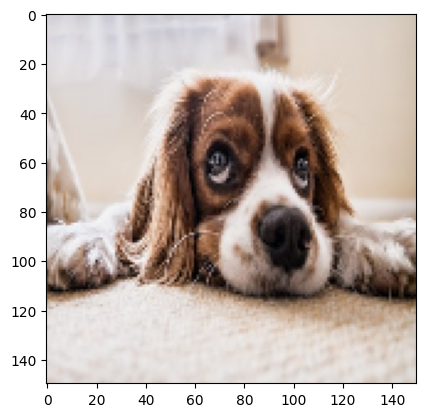

In [19]:
plt.imshow(image[0])

In [20]:
image=tf.keras.applications.vgg16.preprocess_input(image)

In [21]:
image.shape

(1, 150, 150, 3)

In [22]:
predict=vgg16.predict(image)

1/1 [==============================] - 7s 7s/step


In [23]:
predict.shape

(1, 4, 4, 512)

In [24]:
predict[0,:,:,0]

array([[  0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      ,   0.      ,   0.      ],
       [  0.      ,   0.      , 170.45897 ,  93.61289 ],
       [  0.      ,  14.147058, 119.93864 ,  59.810318]], dtype=float32)

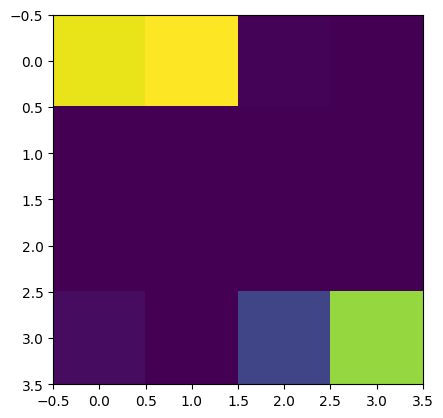

In [25]:
plt.imshow(predict[0,:,:,123])

In [26]:
for layer in vgg16.layers:
  layer.trainable=False
  print(layer.name ,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [27]:
flat=tf.keras.layers.Flatten()(vgg16.output)
dense= tf.keras.layers.Dense(64,activation="relu")(flat)
output=tf.keras.layers.Dense(2,activation="softmax")(dense)

In [28]:
model=tf.keras.models.Model(inputs=[vgg16.input],outputs=[output])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [30]:
for layers in model.layers:
  print(layers.name,layers.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten True
dense True
dense_1 True


In [31]:
! unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [32]:
! unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [33]:
idg=tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1,
                                                preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [34]:
import os

In [35]:
df=pd.DataFrame(columns=["filename","label"])
df['filename']=os.listdir("train/")
df['label']=df.filename.str.split(".",expand=True)[0]

In [36]:
df.head(5)

,filename,label
0,cat.5019.jpg,cat
1,cat.6569.jpg,cat
2,cat.6441.jpg,cat
3,cat.3947.jpg,cat
4,dog.9367.jpg,dog


In [37]:
train_idg=idg.flow_from_dataframe(dataframe=df, directory="train/",batch_size=64,x_col='filename',
                        y_col='label',target_size=(150,150),subset="training")

Found 22500 validated image filenames belonging to 2 classes.


In [38]:
val_idg=idg.flow_from_dataframe(dataframe=df, directory="train/",batch_size=64,x_col='filename',
                        y_col='label',target_size=(150,150),subset="validation")

Found 2500 validated image filenames belonging to 2 classes.


In [39]:
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"])

In [40]:
model_history=model.fit(train_idg,validation_data=val_idg,epochs=10,batch_size=64)

Epoch 1/10
352/352 [==============================] - 97s 260ms/step - loss: 0.9786 - acc: 0.9453 - val_loss: 0.0825 - val_acc: 0.9688
Epoch 2/10
352/352 [==============================] - 88s 250ms/step - loss: 0.0760 - acc: 0.9734 - val_loss: 0.0793 - val_acc: 0.9672
Epoch 3/10
352/352 [==============================] - 88s 249ms/step - loss: 0.0522 - acc: 0.9796 - val_loss: 0.0832 - val_acc: 0.9724
Epoch 4/10
352/352 [==============================] - 88s 251ms/step - loss: 0.0391 - acc: 0.9840 - val_loss: 0.0927 - val_acc: 0.9712
Epoch 5/10
352/352 [==============================] - 90s 255ms/step - loss: 0.0281 - acc: 0.9887 - val_loss: 0.1047 - val_acc: 0.9688
Epoch 6/10
352/352 [==============================] - 92s 262ms/step - loss: 0.0209 - acc: 0.9911 - val_loss: 0.1130 - val_acc: 0.9684
Epoch 7/10
352/352 [==============================] - 91s 257ms/step - loss: 0.0152 - acc: 0.9926 - val_loss: 0.1232 - val_acc: 0.9652
Epoch 8/10
352/352 [==============================] - 9

In [41]:
model.save("transfer_learning_dogs_vs_cats")

In [42]:
! wget https://cdn.pixabay.com/photo/2015/11/16/14/43/cat-1045782__340.jpg

--2023-04-10 16:22:02--  https://cdn.pixabay.com/photo/2015/11/16/14/43/cat-1045782__340.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.15.16, 104.18.14.16, 2606:4700::6812:f10, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.15.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64804 (63K) [image/jpeg]
Saving to: ‘cat-1045782__340.jpg’

cat-1045782__340.jp 100%[===================>]  63.29K  --.-KB/s    in 0.001s  

2023-04-10 16:22:02 (64.5 MB/s) - ‘cat-1045782__340.jpg’ saved [64804/64804]



In [43]:
image=cv2.cvtColor(cv2.imread("/content/cat-1045782__340.jpg"),cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(150,150))
image = tf.keras.applications.vgg16.preprocess_input(image)
image = np.expand_dims(image, axis=0)

In [44]:
result=model.predict(image)

1/1 [==============================] - 0s 160ms/step


In [45]:
np.argmax(result)

0

In [46]:
train_idg.class_indices

{'cat': 0, 'dog': 1}

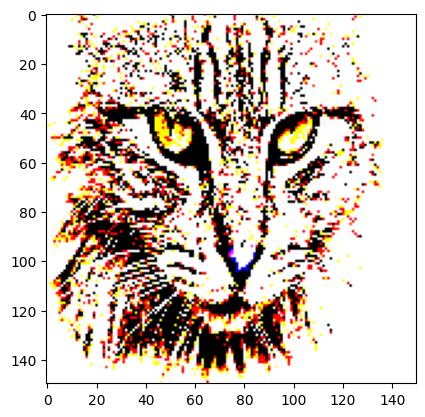

In [48]:
plt.imshow(image[0])